In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [18]:
# Define the unconditional diffusion model
class UnconditionalDiffusionModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(UnconditionalDiffusionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [19]:
# Define the negative log-likelihood loss function
def nll_loss(x, y):
    return torch.mean(torch.sum((x - y) ** 2, dim=1))

# Define the perceptual loss function
def perceptual_loss(x, y):
    return torch.mean(torch.abs(x - y))

In [20]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [21]:
# Initialize the unconditional diffusion model
unconditional_model = UnconditionalDiffusionModel(input_size=784, hidden_size=256)

# Define the optimizer for the unconditional model
unconditional_optimizer = optim.Adam(unconditional_model.parameters(), lr=0.001)

# Train the unconditional diffusion model
for epoch in range(10):
    for i, (images, _) in enumerate(train_loader):
        # Flatten the images
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = unconditional_model(images)

        # Compute the loss
        loss = nll_loss(outputs, images)

        # Backward and optimize
        unconditional_optimizer.zero_grad()
        loss.backward()
        unconditional_optimizer.step()

        # Print the loss
        if (i+1) % 100 == 0:
            print('Unconditional Model - Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, i+1, len(train_loader), loss.item()))

Unconditional Model - Epoch [1/10], Step [100/938], Loss: 16.1924
Unconditional Model - Epoch [1/10], Step [200/938], Loss: 9.4988
Unconditional Model - Epoch [1/10], Step [300/938], Loss: 7.3711
Unconditional Model - Epoch [1/10], Step [400/938], Loss: 6.0698
Unconditional Model - Epoch [1/10], Step [500/938], Loss: 5.4503
Unconditional Model - Epoch [1/10], Step [600/938], Loss: 4.6286
Unconditional Model - Epoch [1/10], Step [700/938], Loss: 4.1888
Unconditional Model - Epoch [1/10], Step [800/938], Loss: 4.0051
Unconditional Model - Epoch [1/10], Step [900/938], Loss: 3.6695
Unconditional Model - Epoch [2/10], Step [100/938], Loss: 3.3171
Unconditional Model - Epoch [2/10], Step [200/938], Loss: 3.3141
Unconditional Model - Epoch [2/10], Step [300/938], Loss: 2.8452
Unconditional Model - Epoch [2/10], Step [400/938], Loss: 2.8674
Unconditional Model - Epoch [2/10], Step [500/938], Loss: 2.9525
Unconditional Model - Epoch [2/10], Step [600/938], Loss: 2.8319
Unconditional Model - Ep

In [22]:
# Evaluate the unconditional diffusion model using negative log-likelihood and perceptual metrics
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

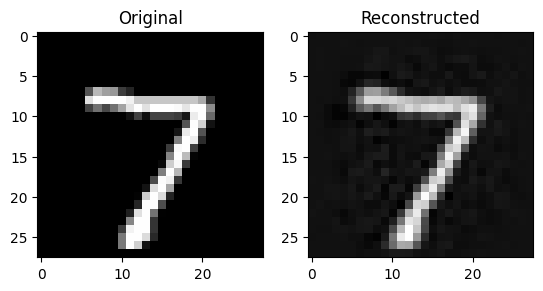

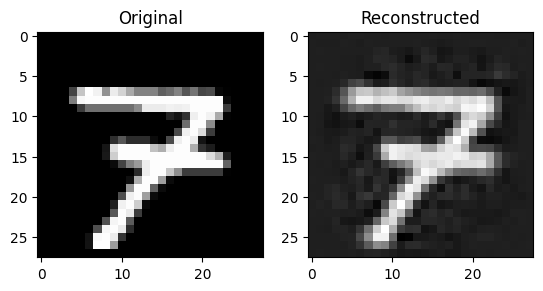

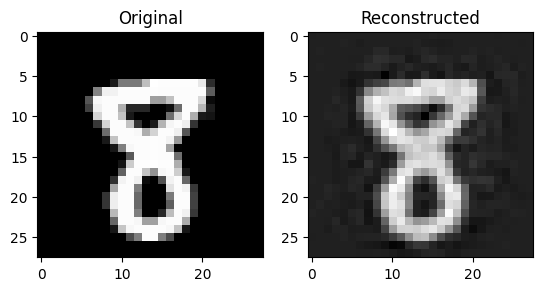

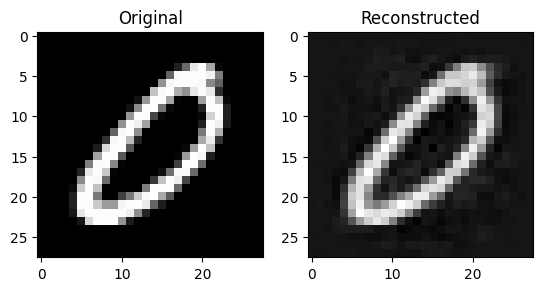

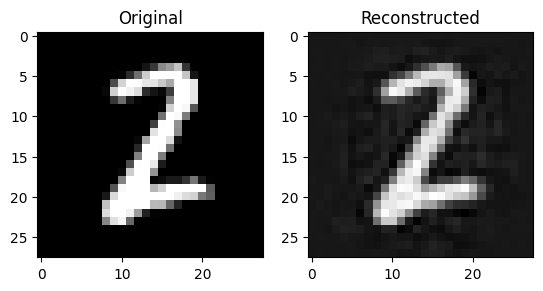

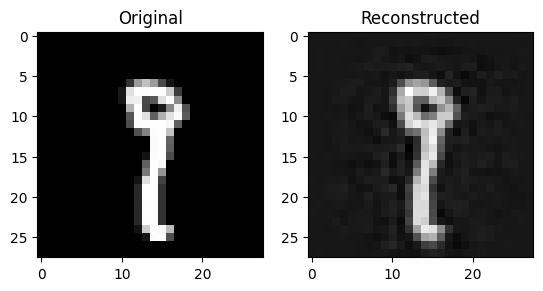

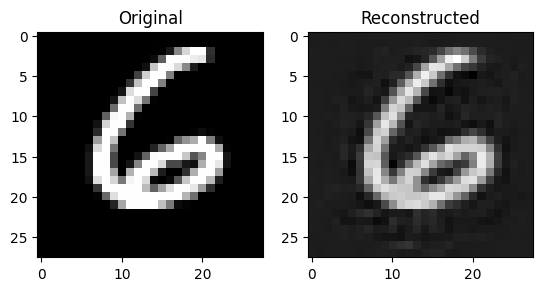

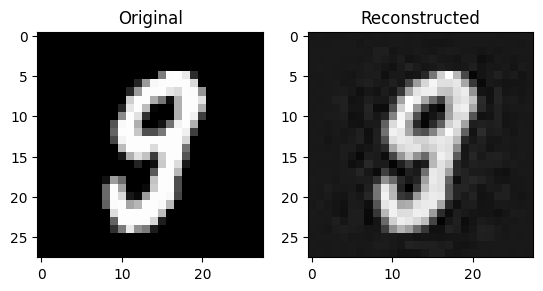

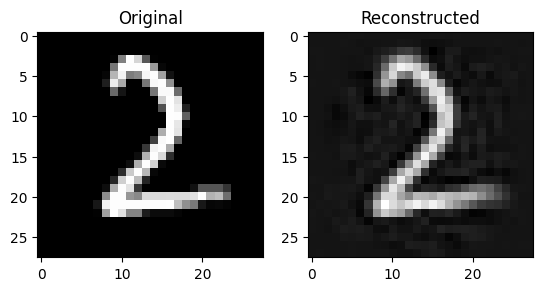

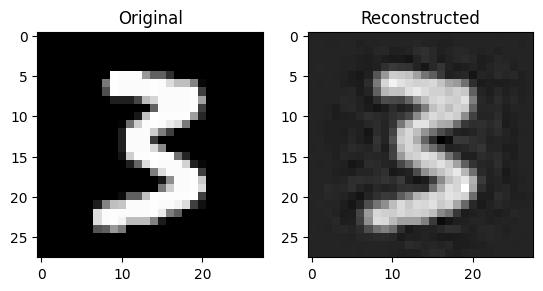

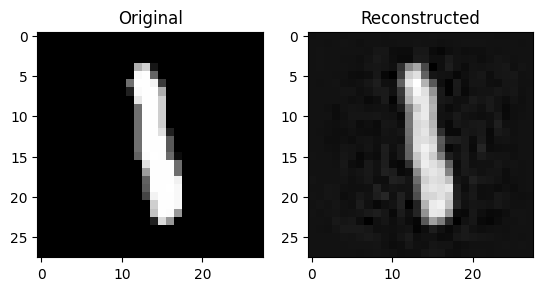

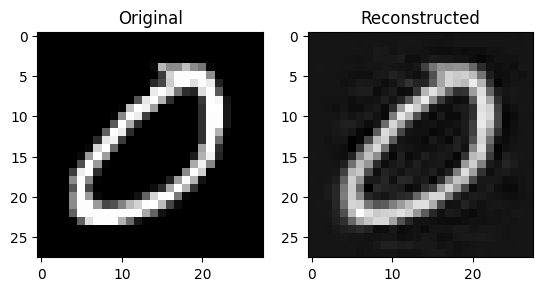

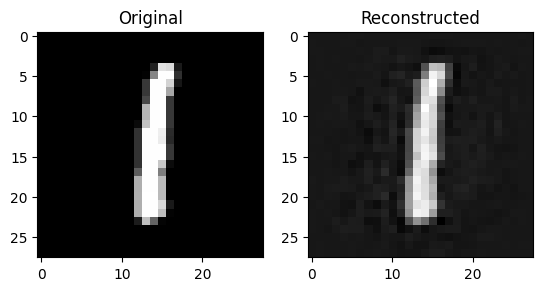

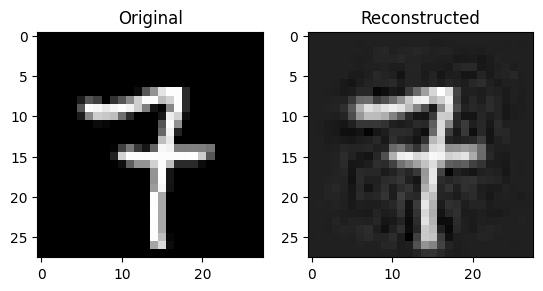

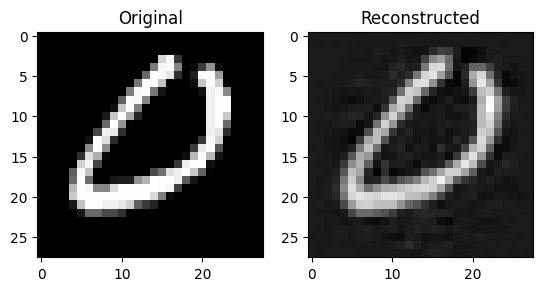

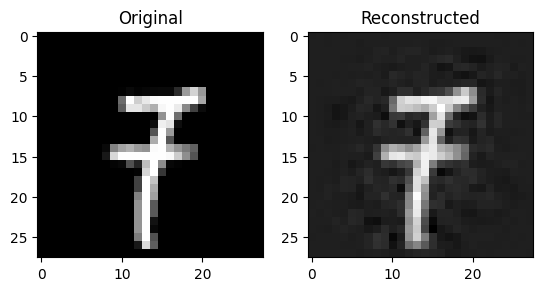

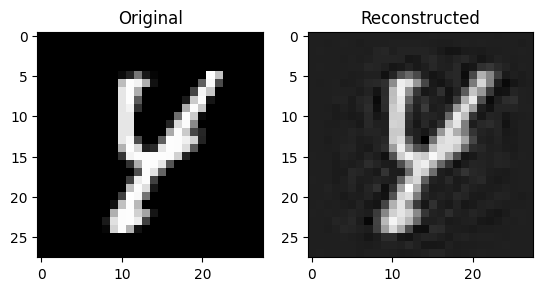

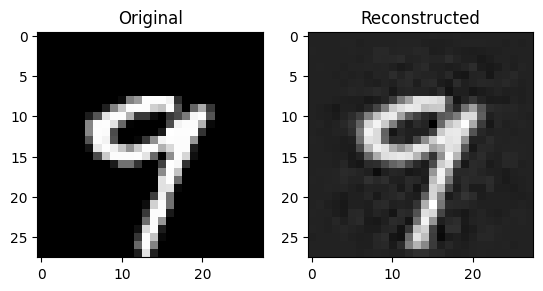

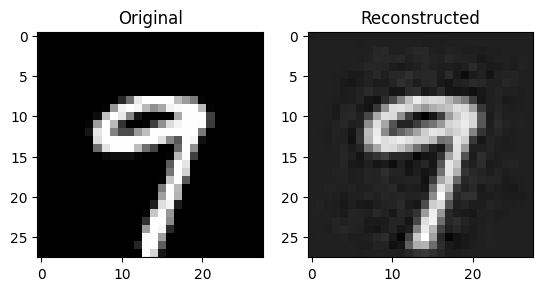

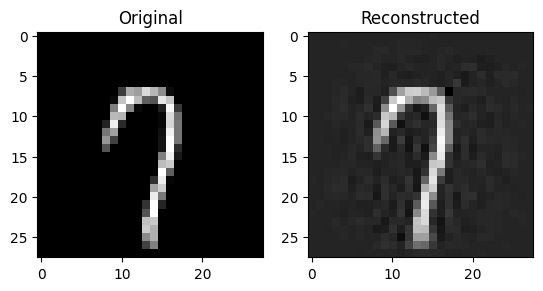

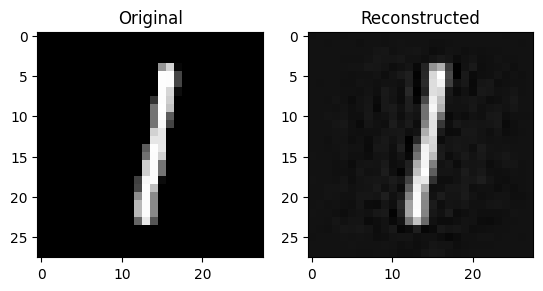

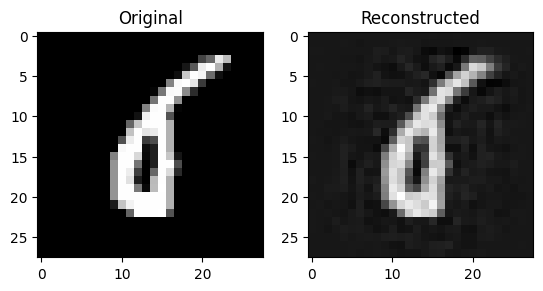

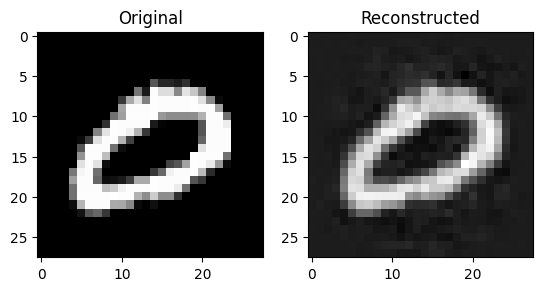

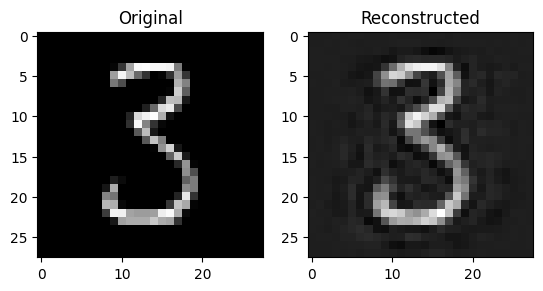

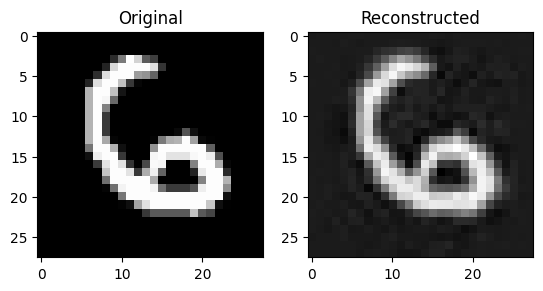

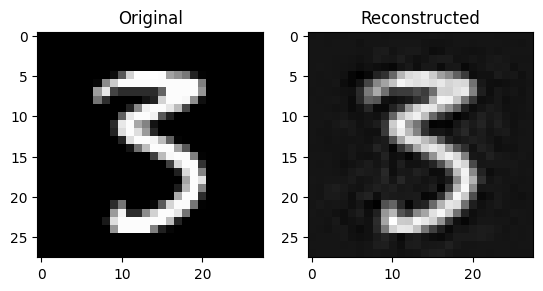

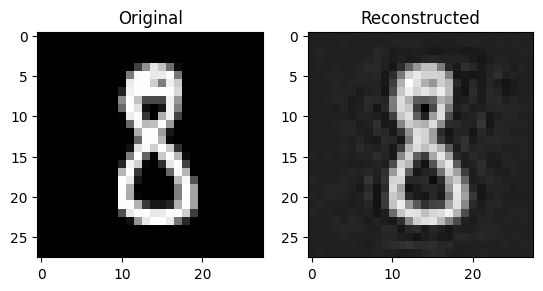

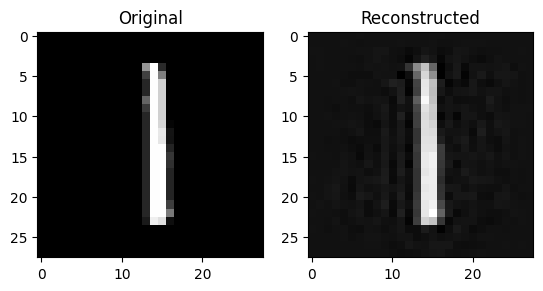

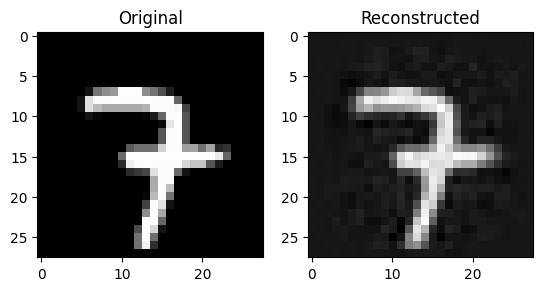

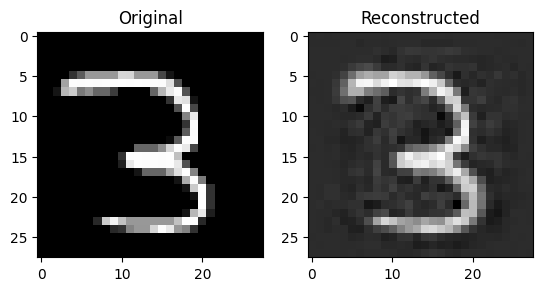

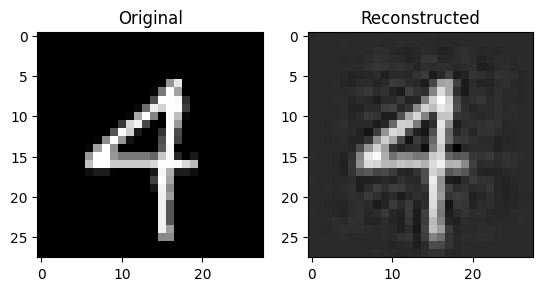

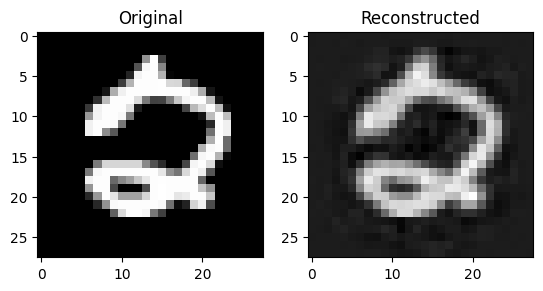

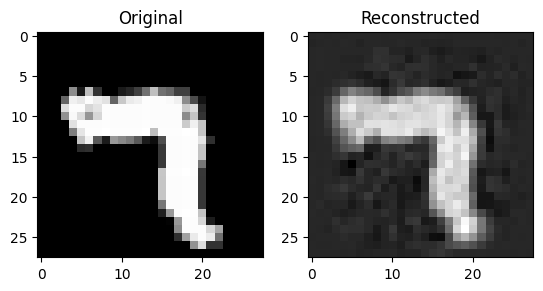

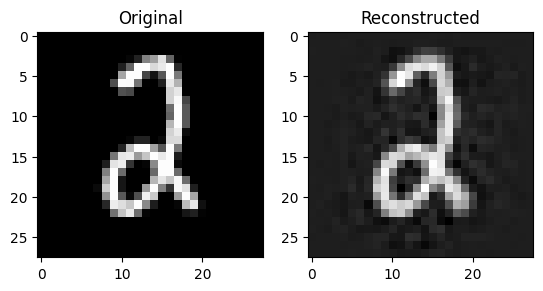

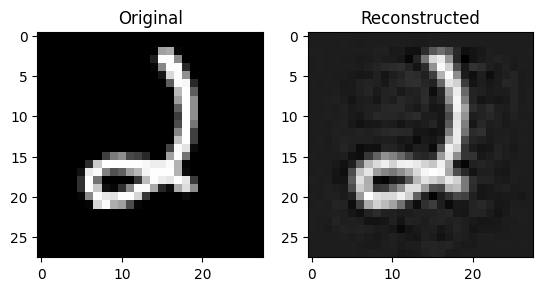

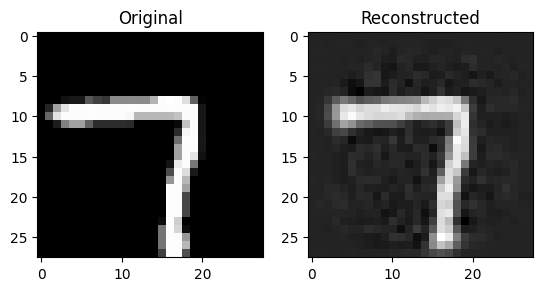

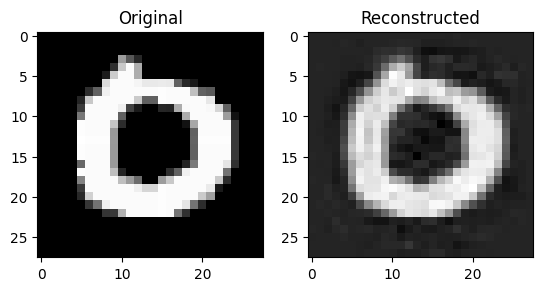

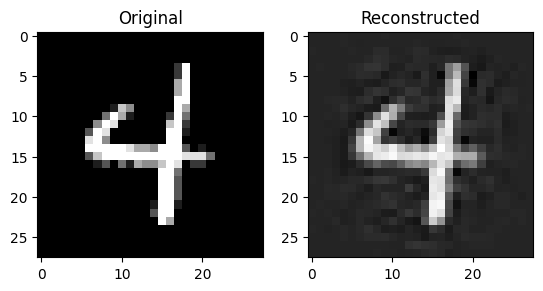

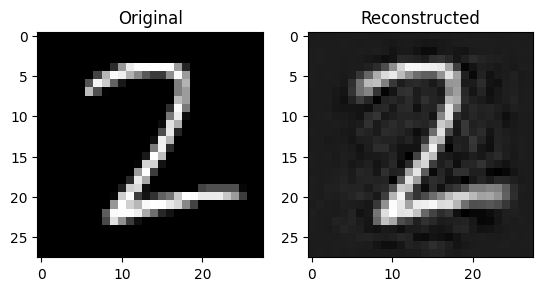

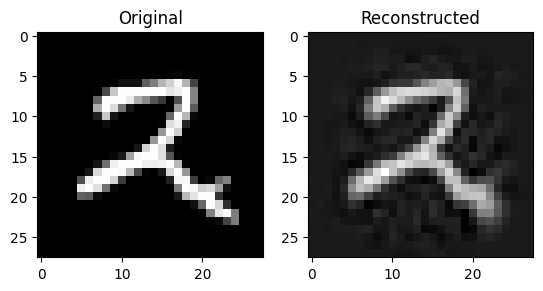

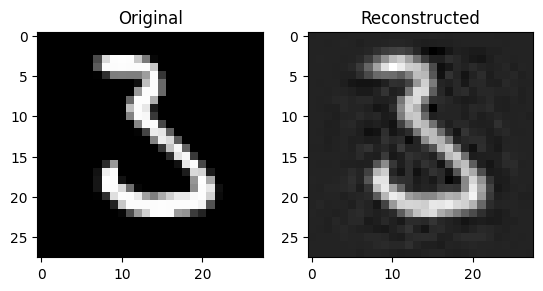

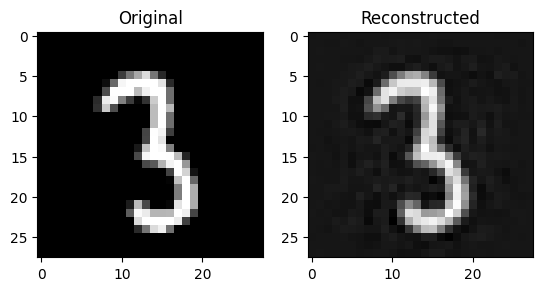

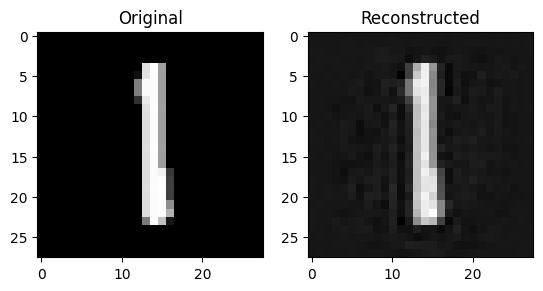

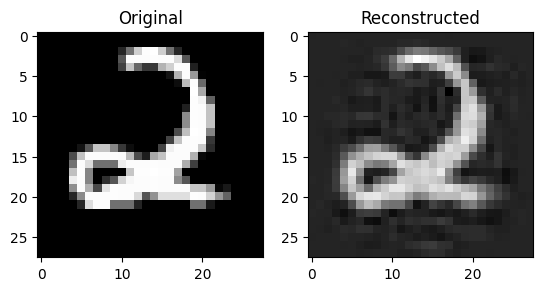

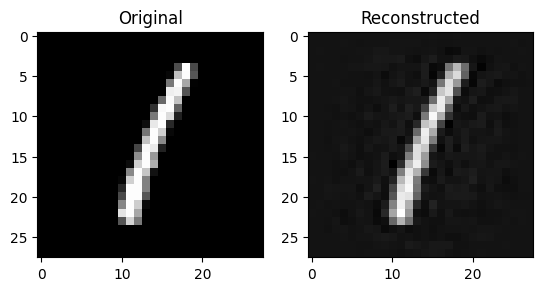

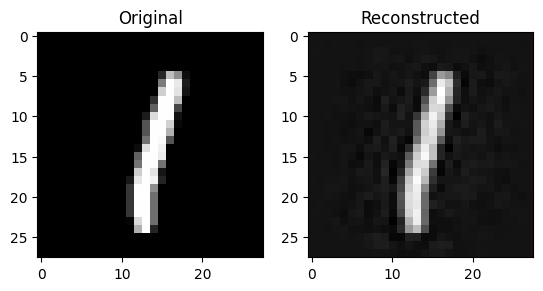

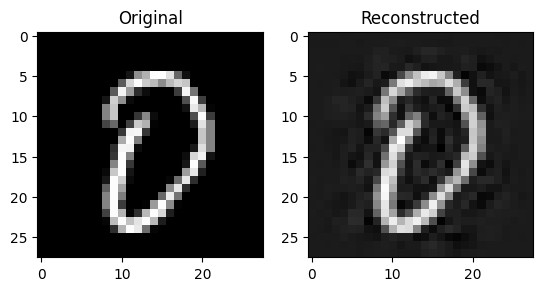

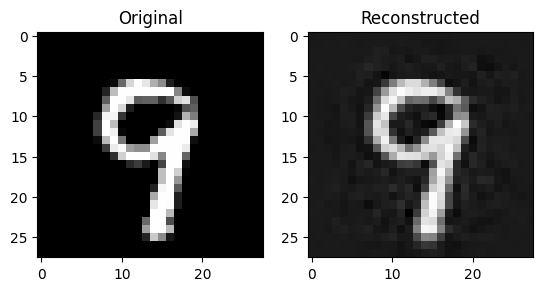

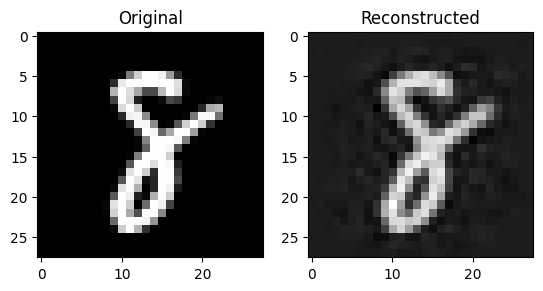

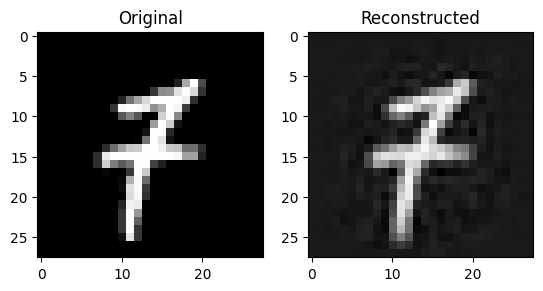

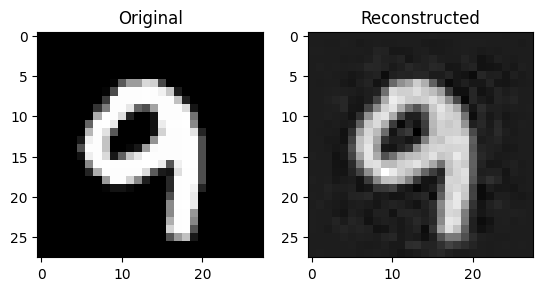

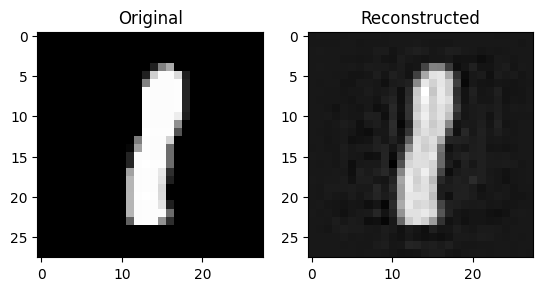

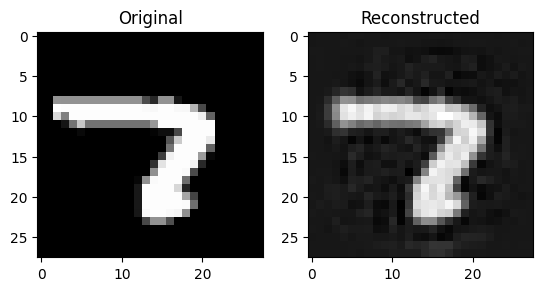

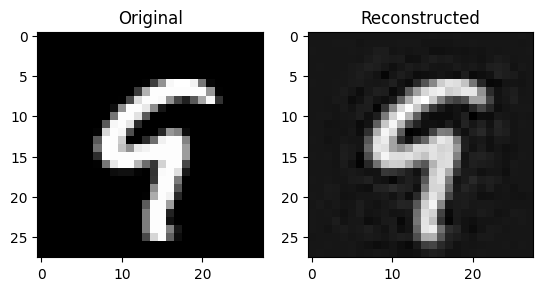

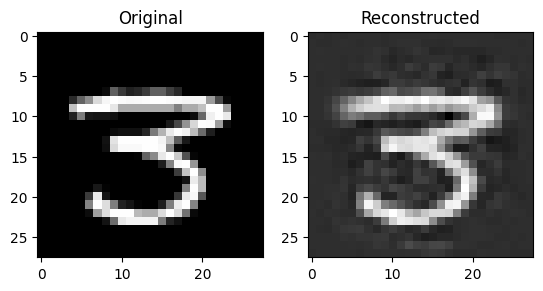

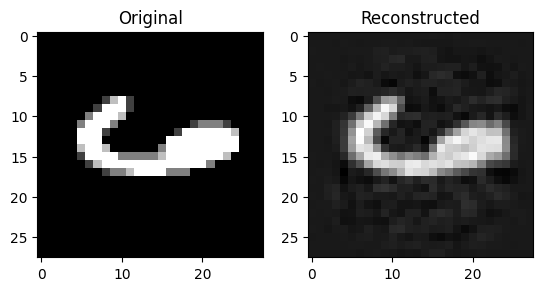

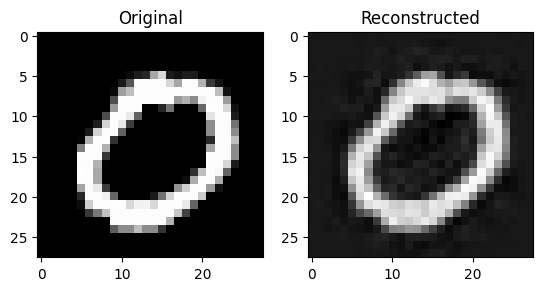

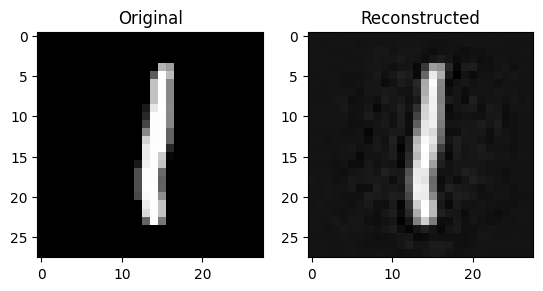

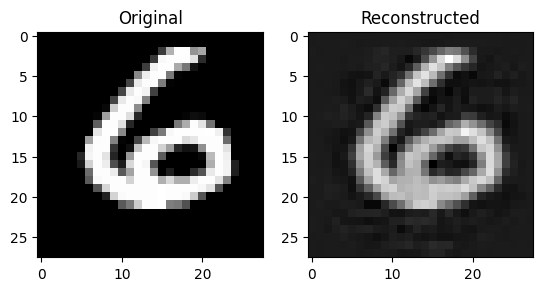

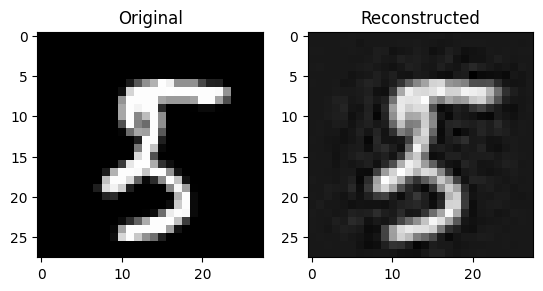

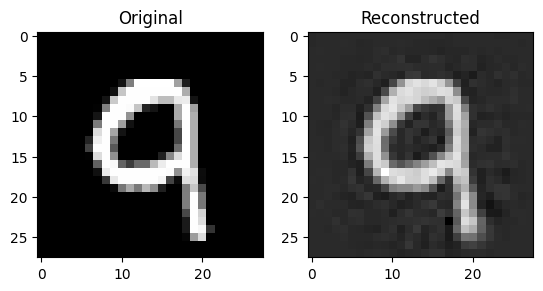

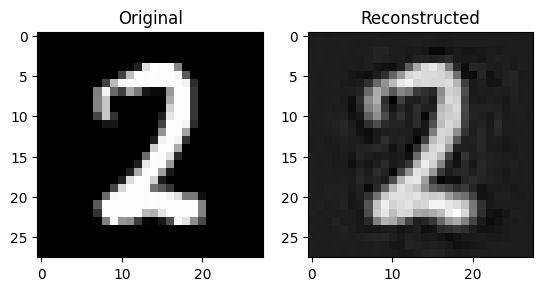

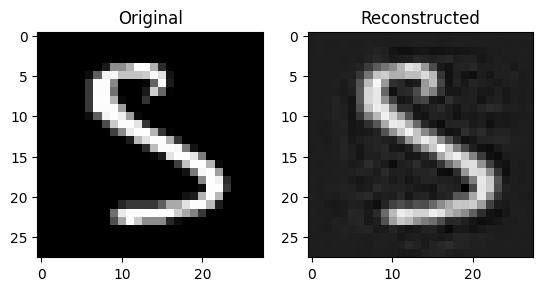

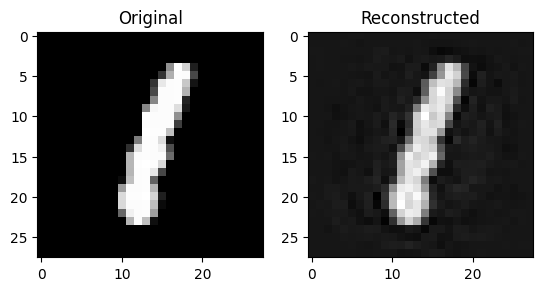

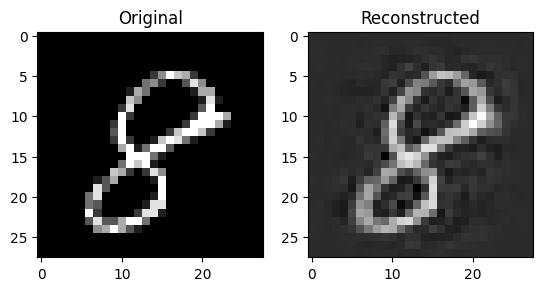

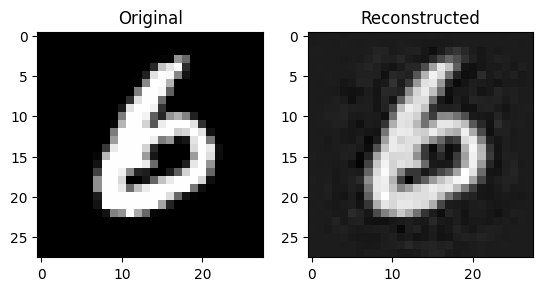

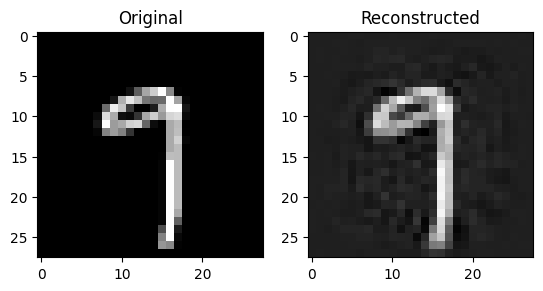

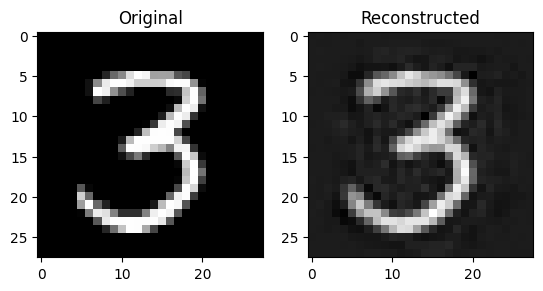

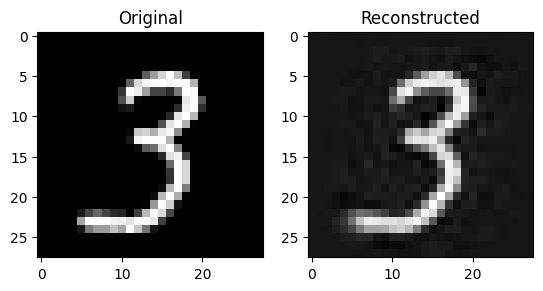

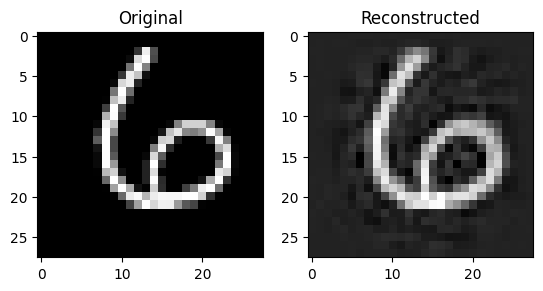

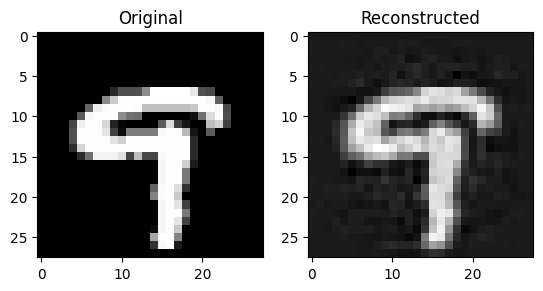

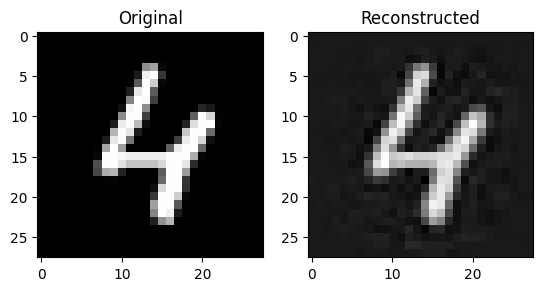

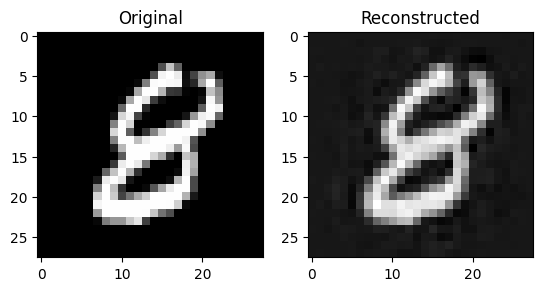

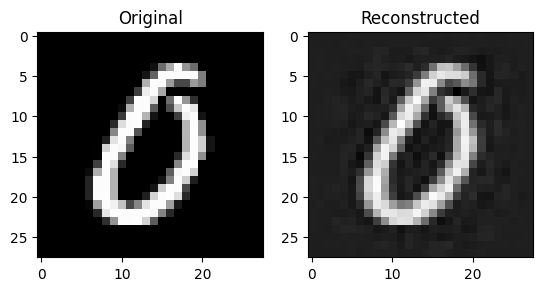

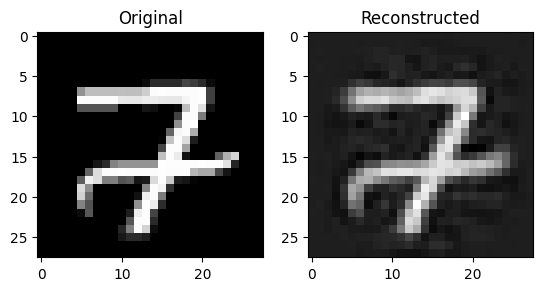

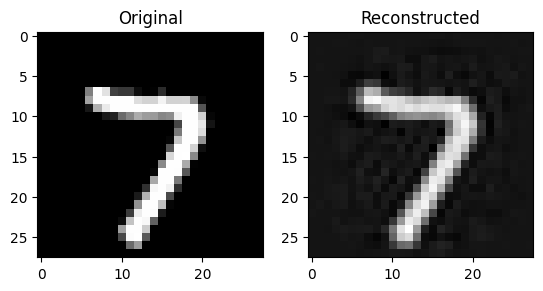

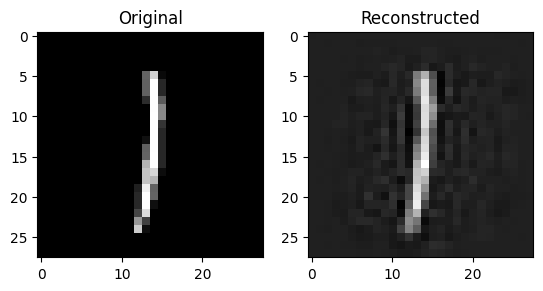

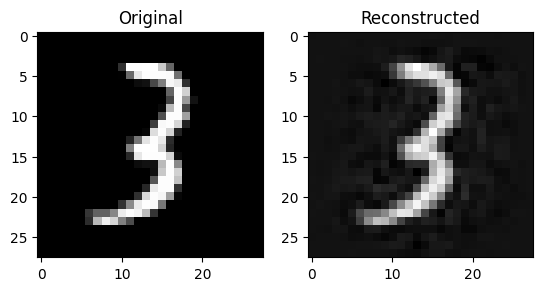

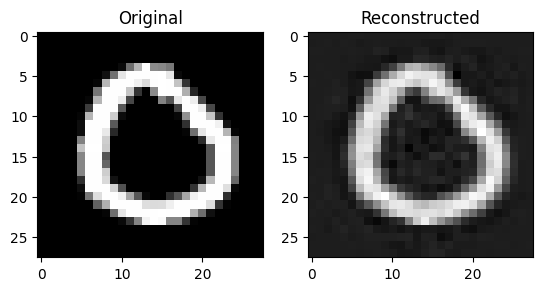

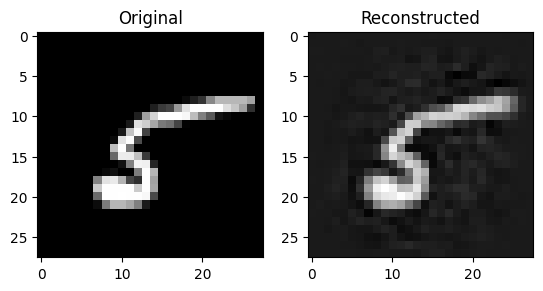

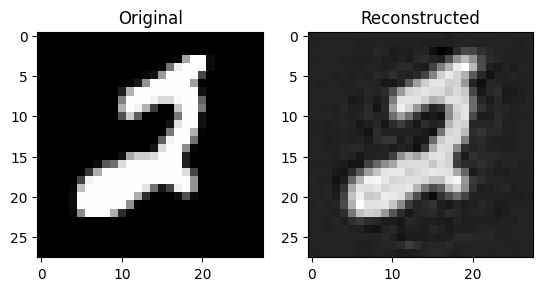

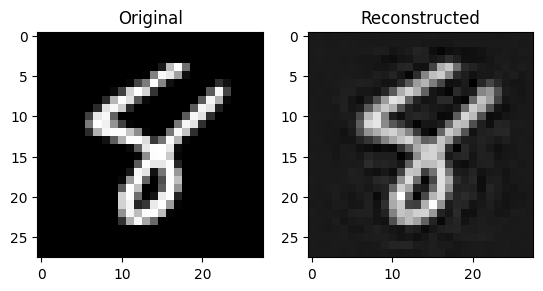

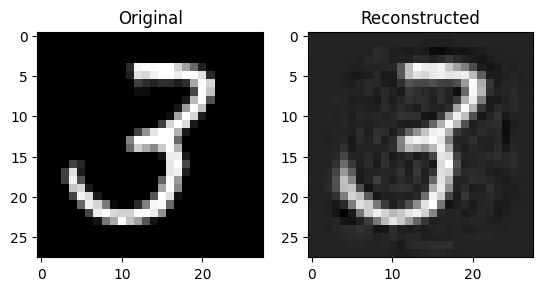

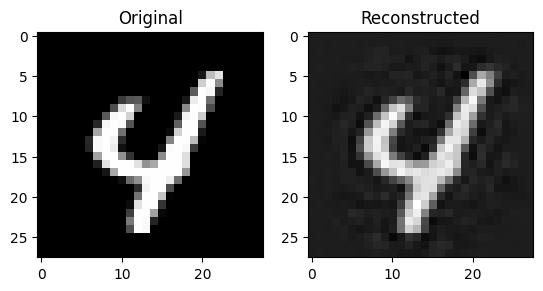

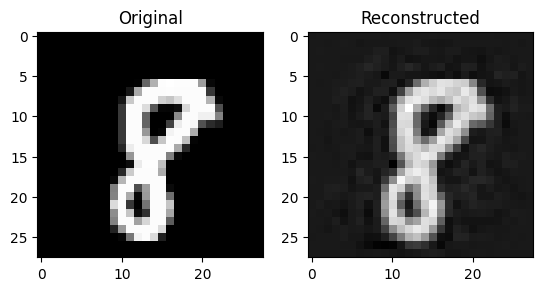

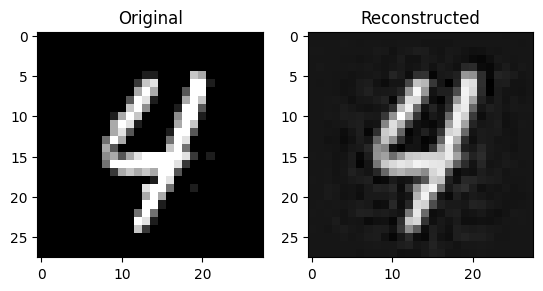

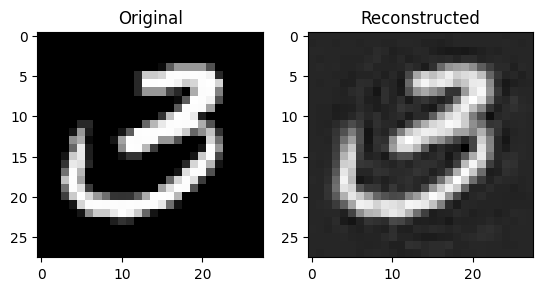

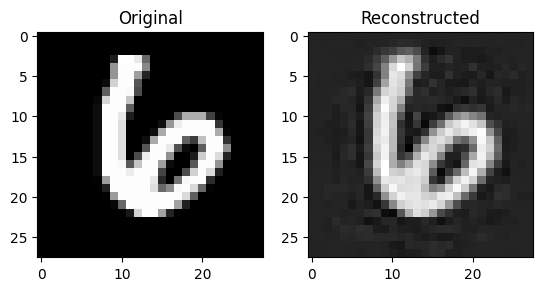

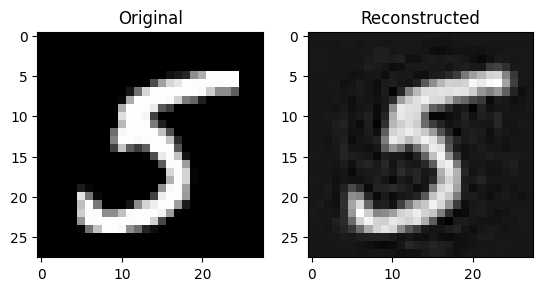

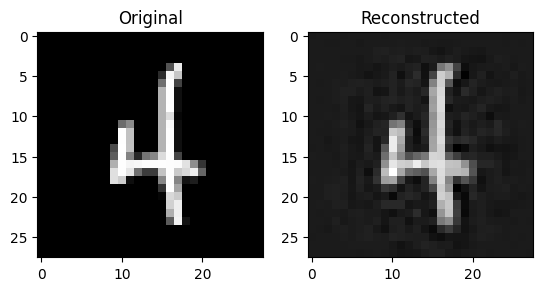

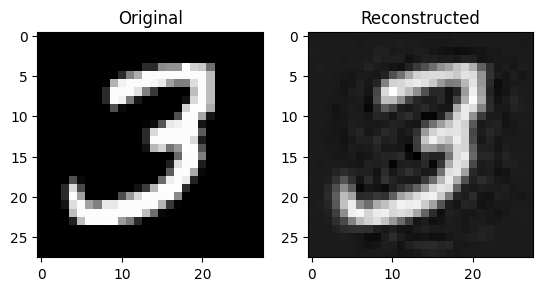

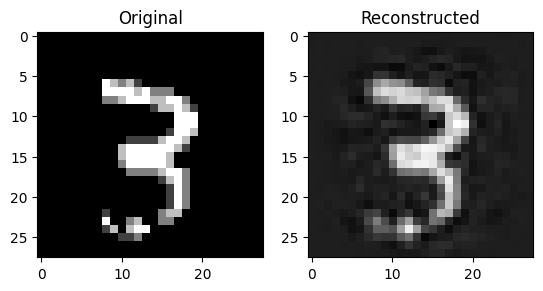

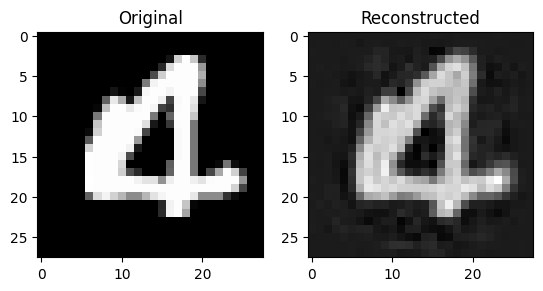

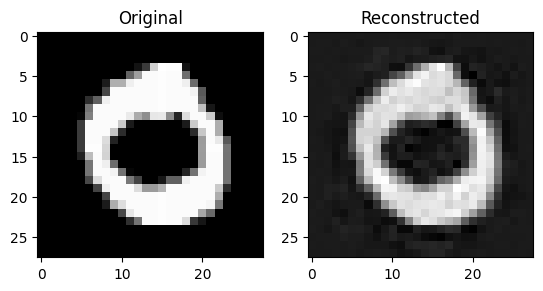

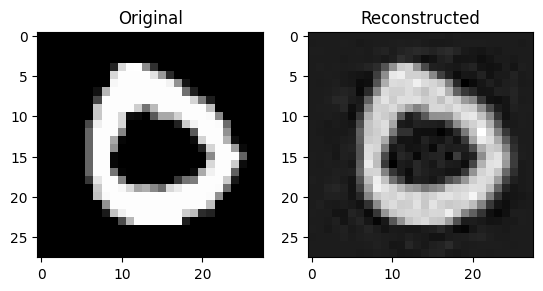

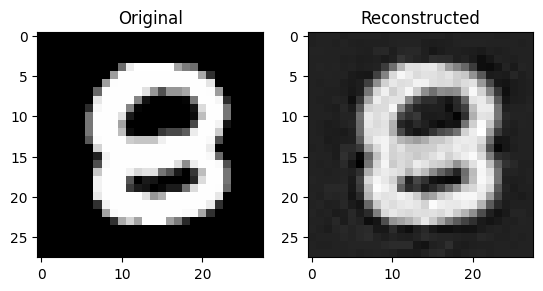

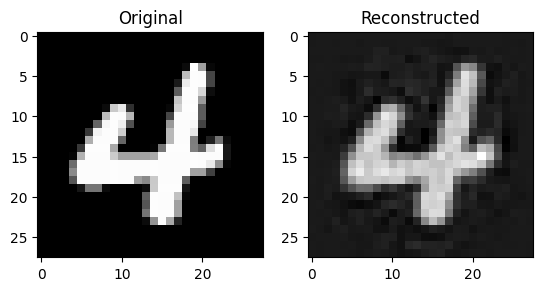

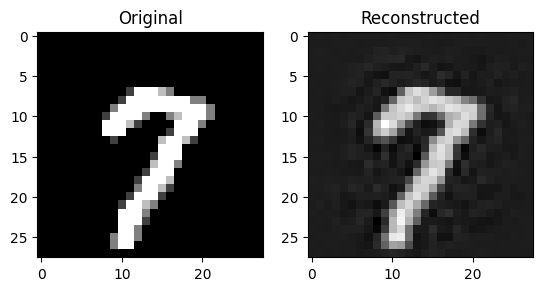

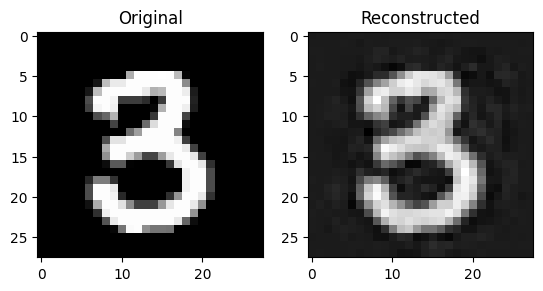

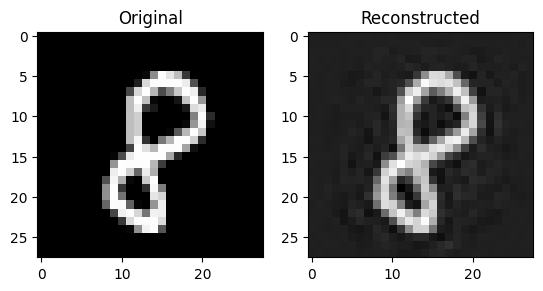

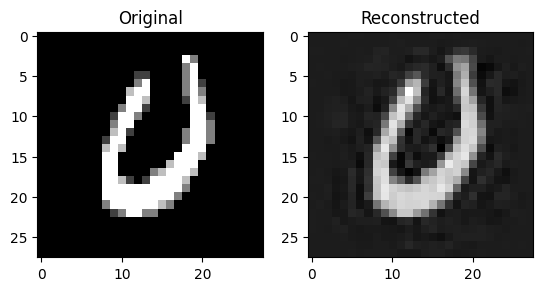

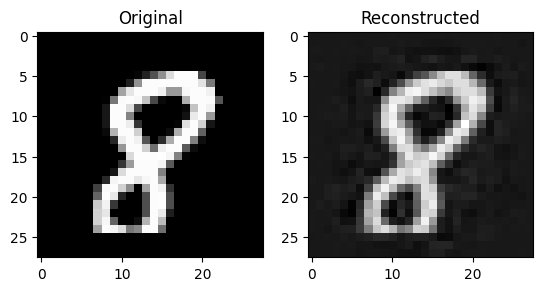

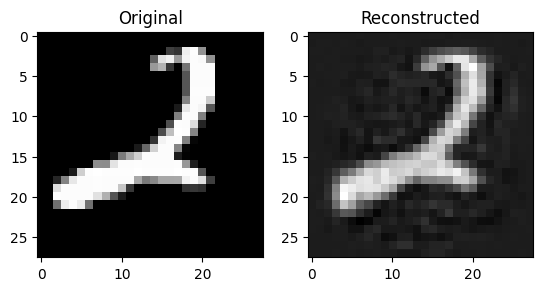

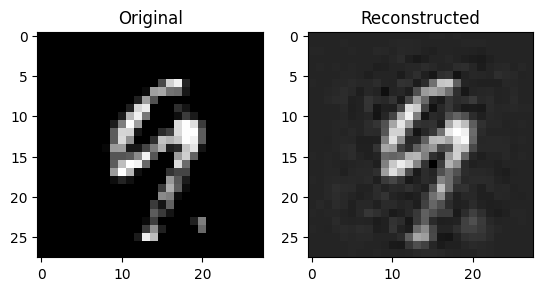

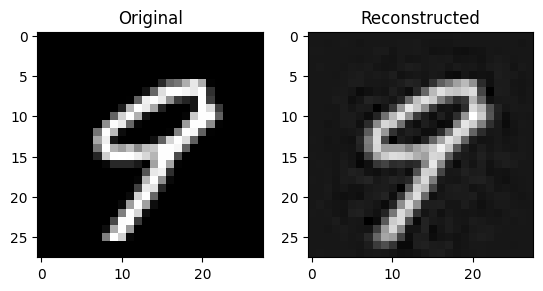

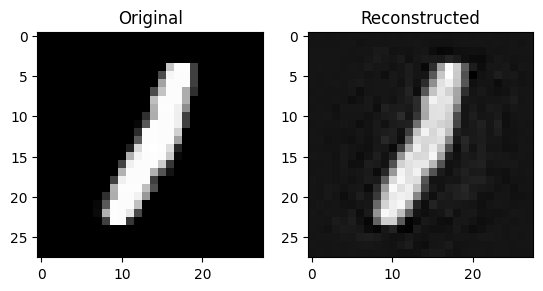

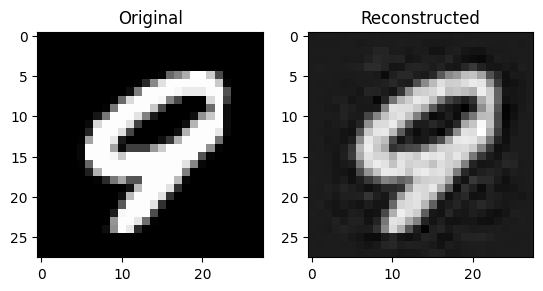

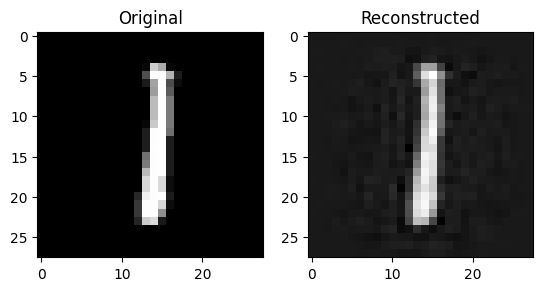

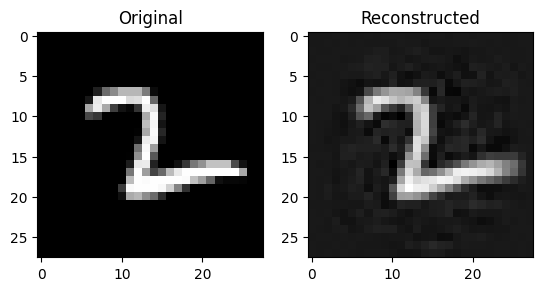

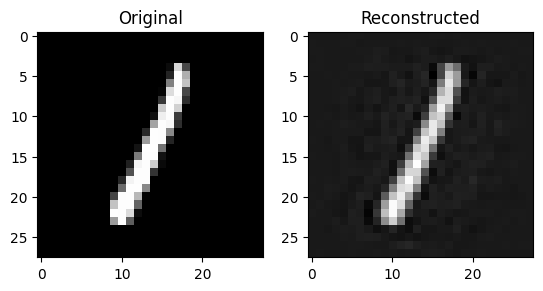

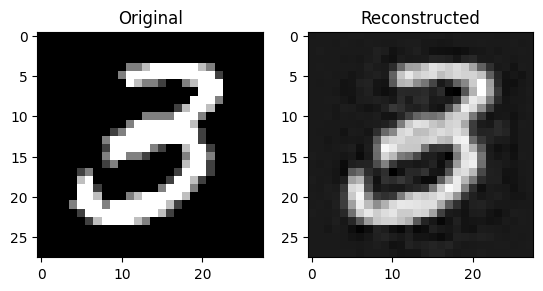

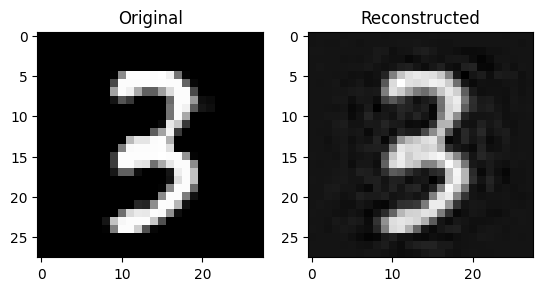

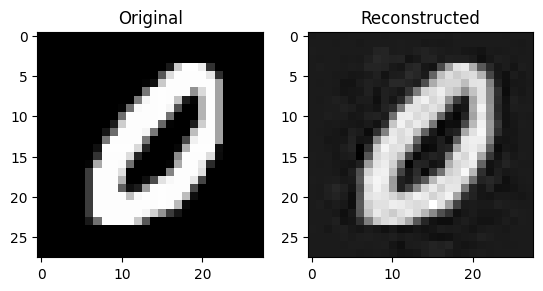

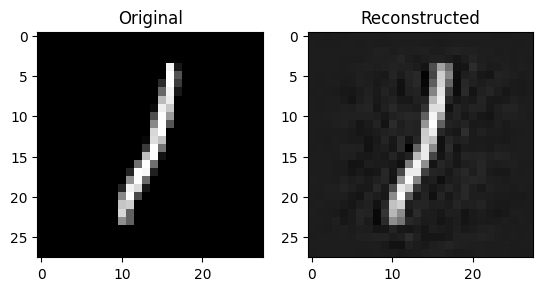

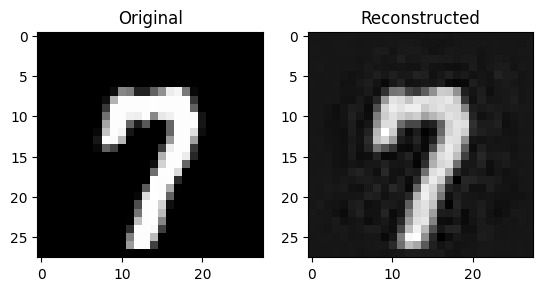

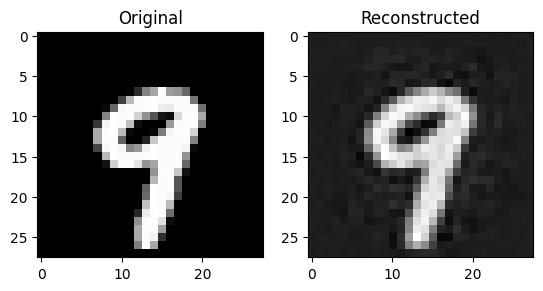

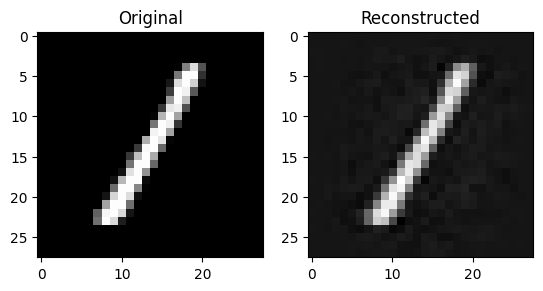

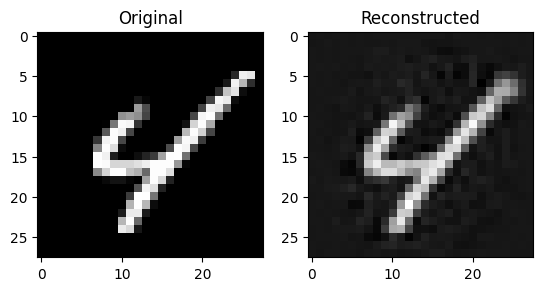

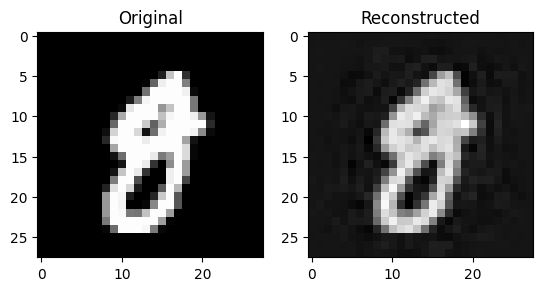

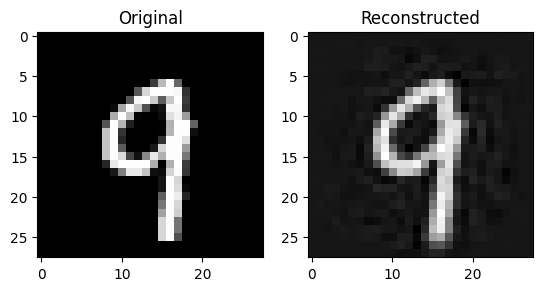

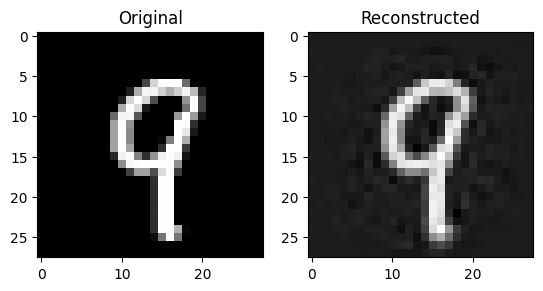

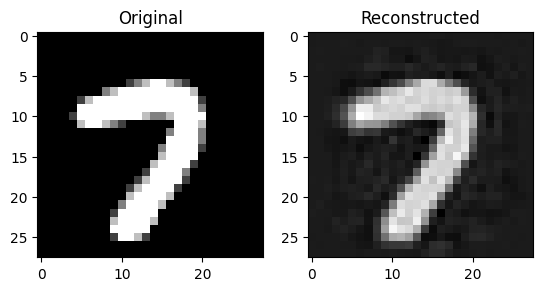

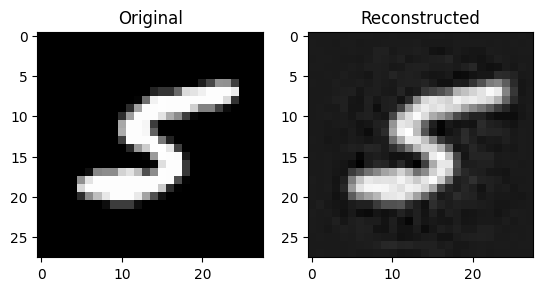

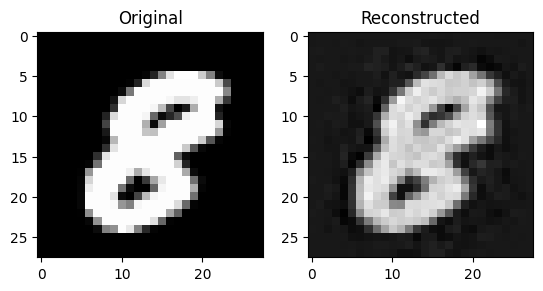

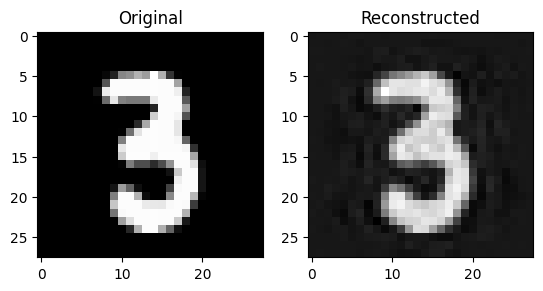

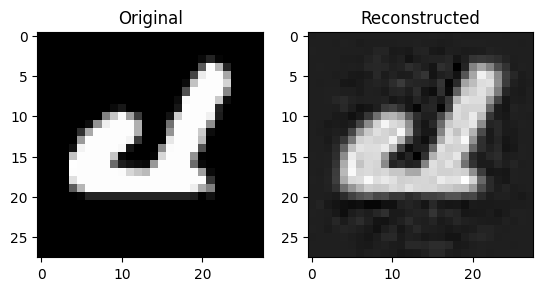

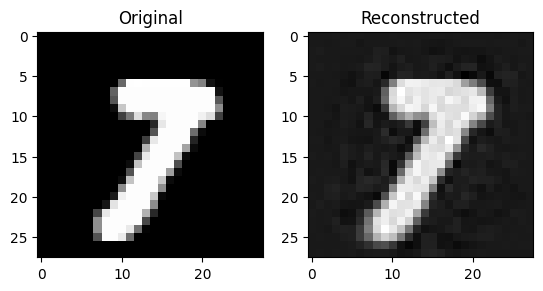

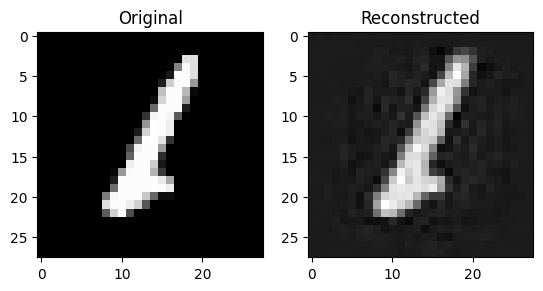

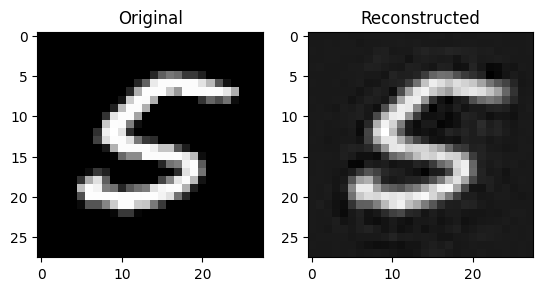

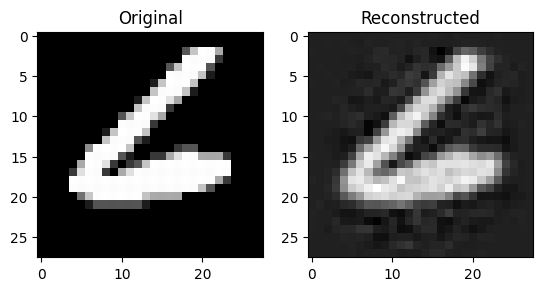

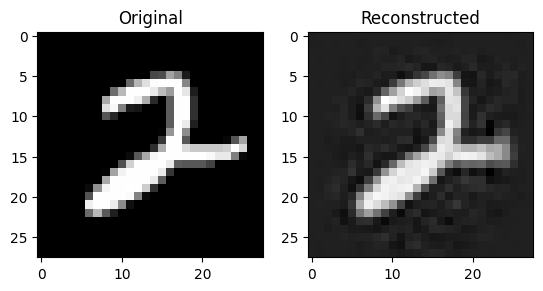

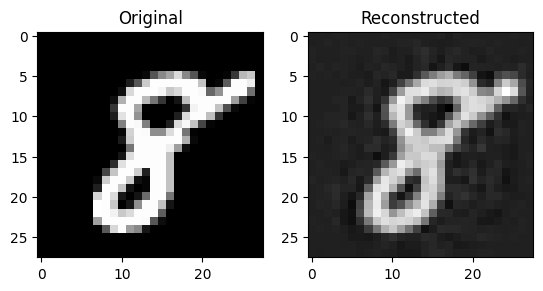

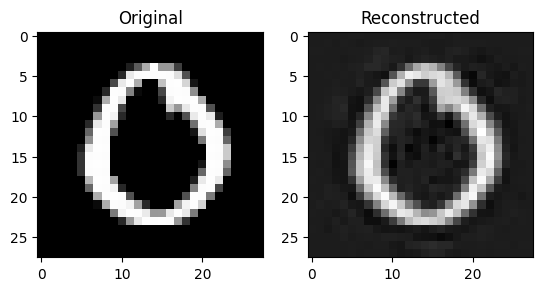

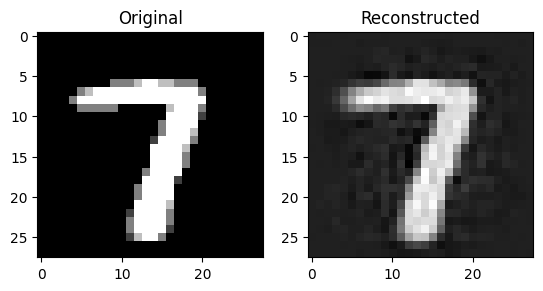

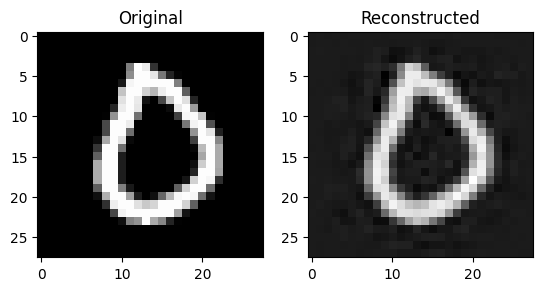

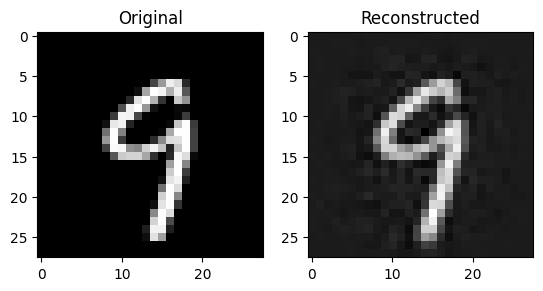

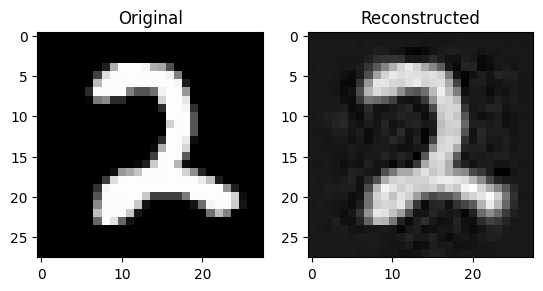

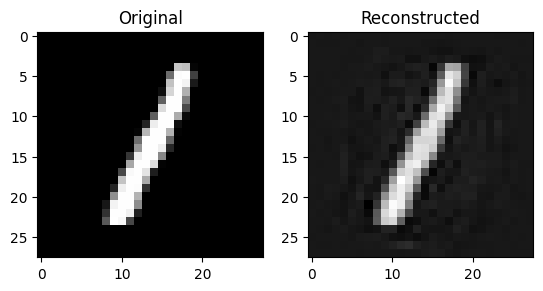

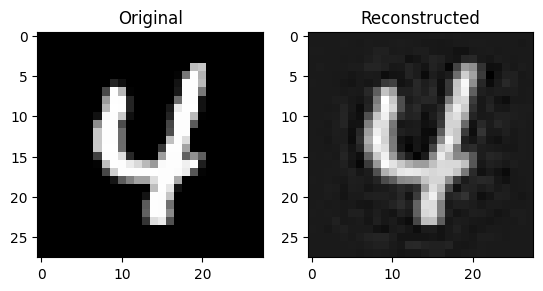

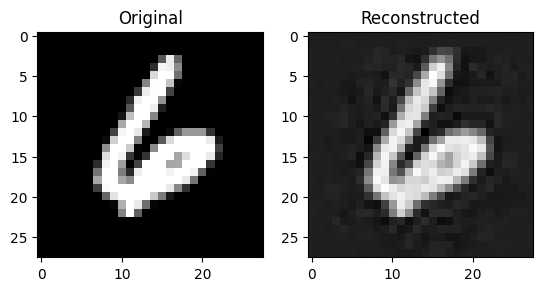

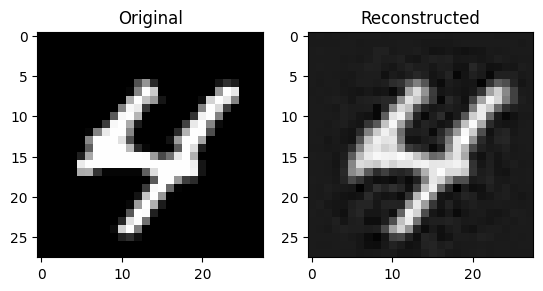

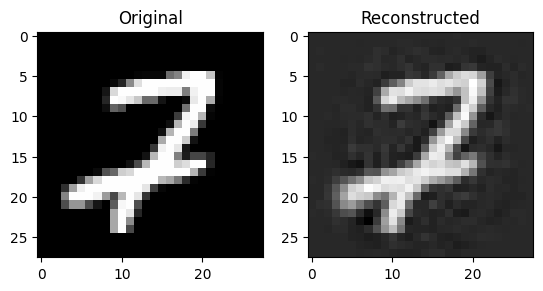

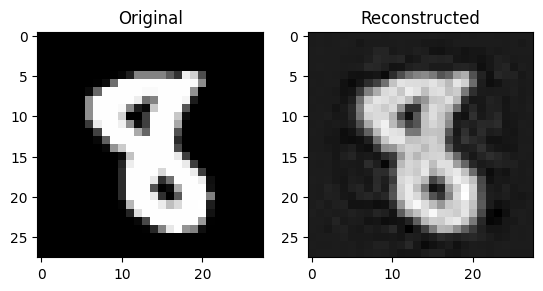

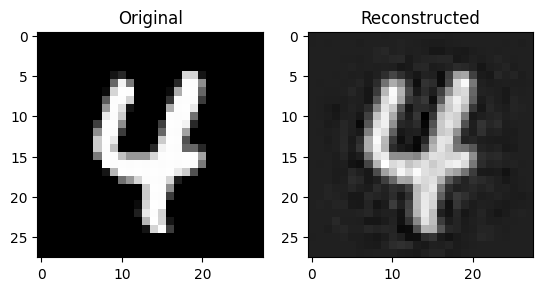

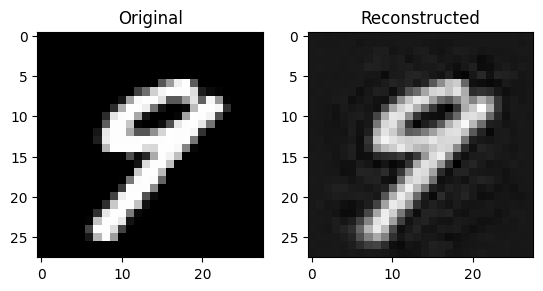

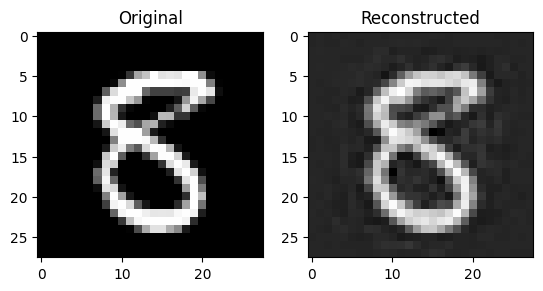

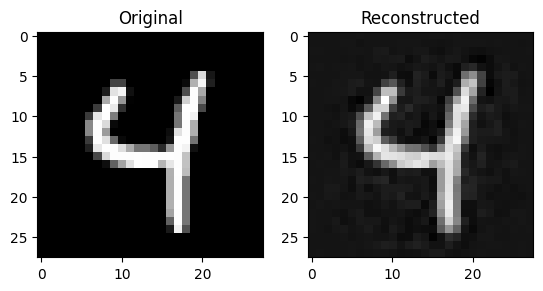

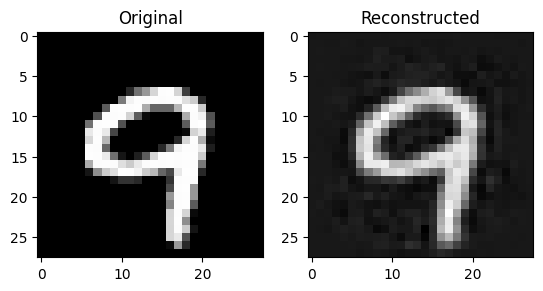

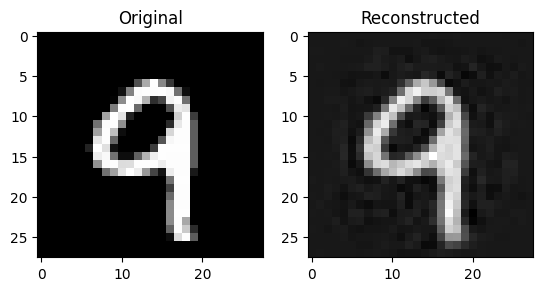

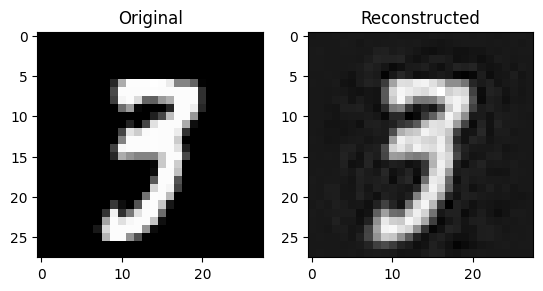

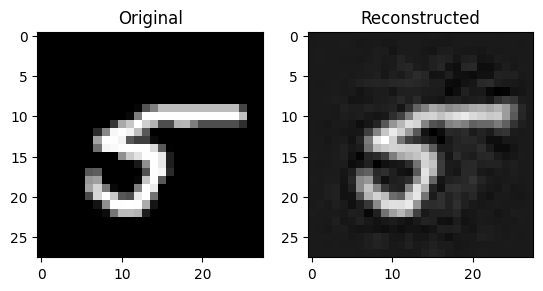

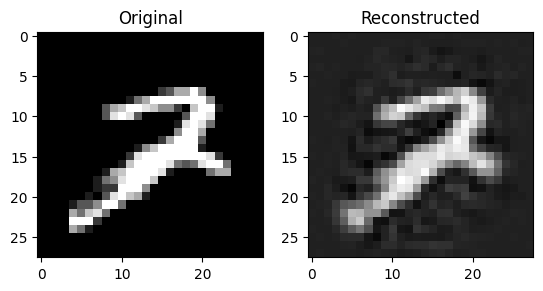

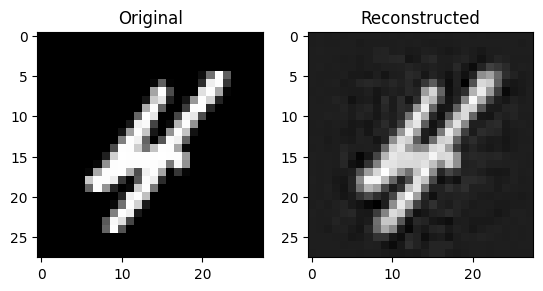

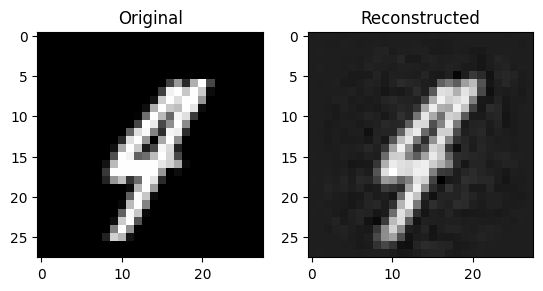

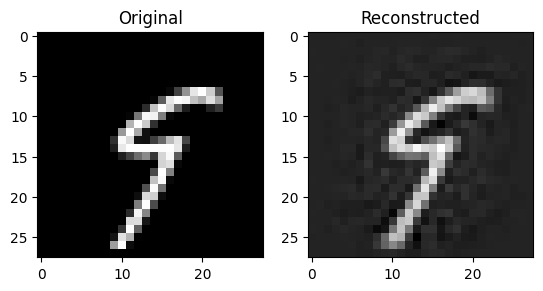

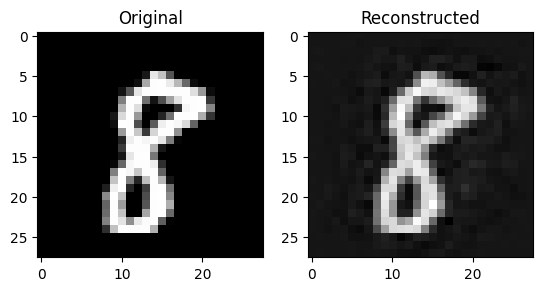

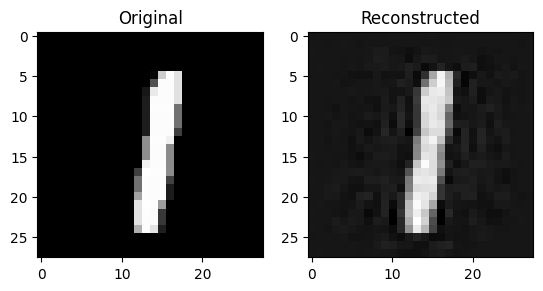

Unconditional Model - Negative Log-Likelihood Loss: 2.1193
Unconditional Model - Perceptual Loss: 0.0302


In [26]:
# Evaluate the unconditional diffusion model using negative log-likelihood and perceptual metrics
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

nll_loss_total = 0
perceptual_loss_total = 0
with torch.no_grad():
    for images, _ in test_loader:
        # Flatten the images
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = unconditional_model(images)

        # Compute the negative log-likelihood loss
        nll_loss_total += nll_loss(outputs, images).item()

        # Compute the perceptual loss
        perceptual_loss_total += perceptual_loss(outputs, images).item()

        # Plot the original and reconstructed images
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(images[0].view(28, 28), cmap='gray')
        axs[0].set_title('Original')
        axs[1].imshow(outputs[0].view(28, 28), cmap='gray')
        axs[1].set_title('Reconstructed')
        plt.show()

nll_loss_avg = nll_loss_total / len(test_loader)
perceptual_loss_avg = perceptual_loss_total / len(test_loader)

print('Unconditional Model - Negative Log-Likelihood Loss: {:.4f}'.format(nll_loss_avg))
print('Unconditional Model - Perceptual Loss: {:.4f}'.format(perceptual_loss_avg))